In [11]:
import numpy as np
import matplotlib.pyplot as plt

import pywt
import pywt.data
from PIL import Image
from sklearn.datasets import load_digits


In [2]:
digits = load_digits()
imagen_matrix = digits.images[0]
repres = Image.fromarray(np.uint8(imagen_matrix))
repres.show()

In [3]:
len(imagen_matrix)

8

In [66]:

# Load image
original = Image.open("./Dataset/WhatsApp Image 2023-11-12 at 17.58.23.jpeg")

In [67]:
grayscale_original = original.convert("L")
imagen_matrix = np.array(grayscale_original)
len(imagen_matrix)

2016

In [68]:
import numpy as np
import random

def sp_noise(image,prob):
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

noise_img = sp_noise(imagen_matrix,0.05)

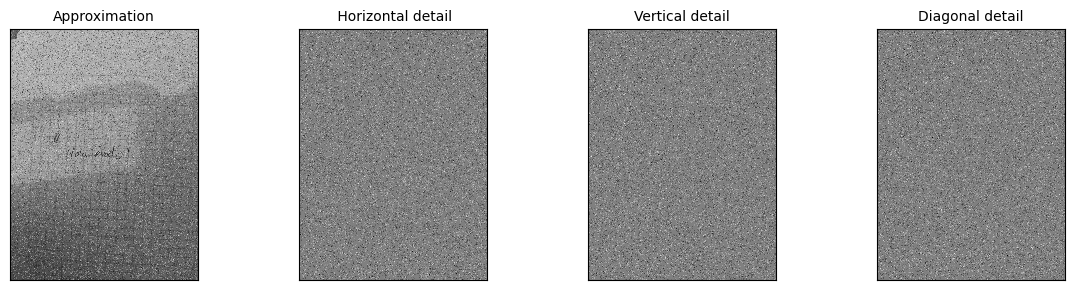

In [69]:

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(noise_img, "haar")
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

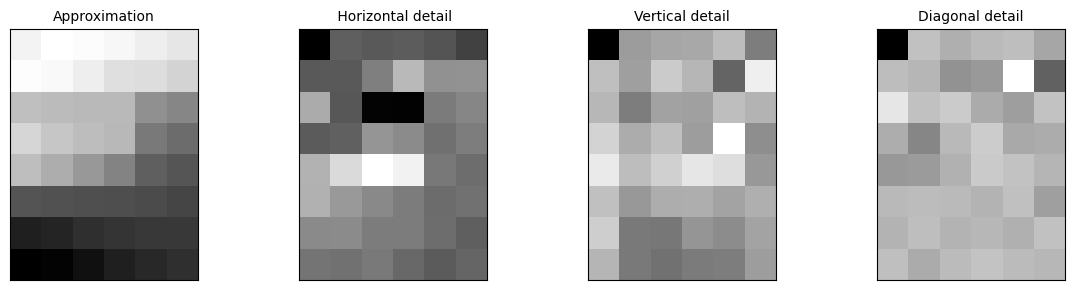

8

In [64]:
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(LL, "haar")
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()
len(LL)

In [1]:
#! pip install Pillow

In [36]:
# A partir de aqui va la red neuronal:
import keras
import tensorflow
from PIL import Image, ImageOps
loaded_model_02 = tensorflow.keras.models.load_model('modelos/modelo_C_02.keras')

LABELS = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 
          'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',
          'a', 'b', 'd', 'e', 'f', 'g', 'h', 'n', 'q', 'r', 't']

index_to_label = {i: label for i, label in enumerate(LABELS)}

1/1 [==============================] - 0s 14ms/step


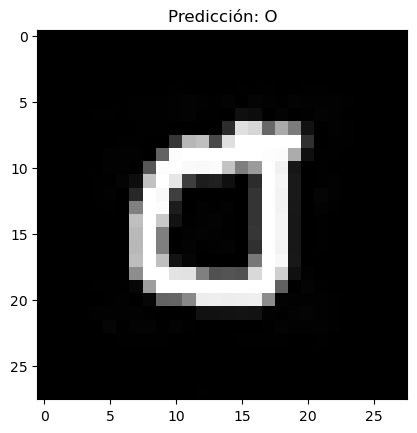

In [54]:
# Aquí cargamos las imágenes que genera el software de Mateo. Las vamos metiendo con un bucle for
# Se preprocesan, redimensionan, transforman a escala de grises normalizada, y se mandan como vector de pixeles

imagen = Image.open("data/images/letra_o.jpg")

# Aquí van las transformaciones wavelets que querais:







imagen_red = imagen.resize((28, 28))
imagen_gris = imagen_red.convert("L")
# MUY IMPORTANTE: las letras tienen que entrar en color blanco sobre fondo negro
# Si no es el caso, usar la siguiente línea y comentar la anterior: 
# Sí está en blanco sobre negro:  --->  imagen_gris = imagen_red.convert("L") <---
# No está en blanco sobre negro:  --->  imagen_gris = ImageOps.invert(imagen_red.convert("L"))  <---
# convert("L") pasa la imagen a escala de grises. Es redundante pero lo hago por integridad


# Aplanar la imagen a un vector de longitud 784
imagen_array = np.array(imagen_gris).reshape(1, 784)
# Normalizar los valores de píxeles al rango [0, 1]
imagen_normalizada = imagen_array.astype('float32') / 255.0
prediction = loaded_model_02.predict(imagen_normalizada)
# Decodificar la predicción para obtener la clase predicha (da un valor entre 0 y 46)
# Para varias imagenes metidas en bucle, hay que hacer un vector char en el que ir metiendo las salidas
# predicted_class te da el valor entre valor entre 0 y 46 que se transforma en letra/número con index_to_label 
predicted_class = np.argmax(prediction)
predicted_label = index_to_label[predicted_class]






# Esto es la representación, no hay que usarlo en la transformación imagenes-texto
plt.imshow(imagen_gris, cmap='gray')         
titulo = f'Predicción: {predicted_label}'
plt.title(titulo)
plt.show()